In [3]:
import os
os.getcwd()

'C:\\Users\\dkafkes\\Desktop\\fermi\\accelerator-reinforcement-learning\\control-for-accelerators-in-hep\\notebooks'

In [4]:
import pandas as pd
import numpy as np
import dask.dataframe as dd

def load_data():
    df = pd.read_csv('../data/MLParamData_1583906408.4261804_From_MLrn_2020-03-10+00_00_00_to_2020-03-11+00_00_00.h5_processed.csv.gz')
    #/data/fermilab-accelerator-ai/MLParamData_1583906408.4261804_From_MLrn_2020-03-10+00_00_00_to_2020-03-11+00_00_00.h5.cvs')
    df=df.replace([np.inf, -np.inf], np.nan)
    df=df.dropna(axis=0)
    #df=df.round(decimals=5)
    return df

df = load_data()
print(df.head())

                      time   B:ACMNPG    B:GMPS4V  B:IMINER   B:LINFRQ  \
0  2020-03-10 05:00:00.048  10.000006  123.134498 -0.270313  26.063342   
1  2020-03-10 05:00:00.114  10.000006  119.234494 -0.305312  26.008777   
2  2020-03-10 05:00:00.180  10.000006  142.959518 -0.260313  26.081531   
3  2020-03-10 05:00:00.246  10.000006  133.534509 -0.185312  26.208850   
4  2020-03-10 05:00:00.312  10.000006   94.534470 -0.095312  26.208850   

      B:VIMAX     B:VIMIN  B:VINHBT  B:VIPHAS   B_ACMNPG     B_VIMIN  \
0  966.083496  103.379570       1.0  1.811700  10.000006  103.393158   
1  966.073730  103.421227       1.0  1.812469  10.000006  103.393158   
2  966.037720  103.425453       1.0  1.810874  10.000006  103.393158   
3  966.054077  103.420357       1.0  1.812430  10.000006  103.393158   
4  966.031189  103.412270       1.0  1.813190  10.000006  103.393158   

   B_VINHBT       I:IB     I:MDAT40       I:MXIB  
0       1.0  7055.9375  6977.386446  6974.145508  
1       1.0  7017.18

<class 'pandas.core.frame.DataFrame'>


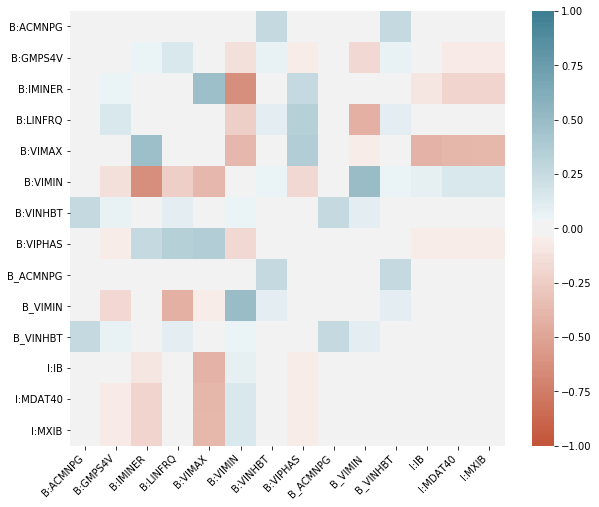

In [5]:
#####################################
## PLOT BASIC CORRELATION FUNCTION ##
#####################################
import seaborn as sns
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

f, ax = plt.subplots(figsize=(10, 8))
corr = df.corr()
corr[corr > 0.9] = 0
print(type(corr))
c = corr.abs()
s = c.unstack()
so = s.sort_values(ascending = False)
#print(so.columns)
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [12]:
#####################################
## GET TOP 5 CORRELATED VARIABLES ##
#####################################
    
def top_5(variable_name, df):
    df = df.corr()
    df[df > 0.9] = 0
    df = df.unstack().sort_values(ascending = False).reset_index()
    df = df.rename(columns={"level_0": "Var1", "level_1": "Var2", 0 : "Corr"})
    df = df[~df["Var2"].str.endswith(str(df.Var1.tolist()[0][2:]))]
    df['Abs Value Corr'] = np.abs(df.Corr)
    df = df.sort_values(by = 'Abs Value Corr', ascending = False)
    
    print("Highest Correlations to {}: ".format(variable_name))
    print(df[['Var2', 'Corr']][df.Var1 == str(variable_name)].head().to_string(index = False))

    return(df[['Var2', 'Corr']][df.Var1 == str(variable_name)].head())

col_1 = top_5('B:VIMIN', df)
print()
col_2 = top_5('B:IMINER', df)

Highest Correlations to B:VIMIN: 
     Var2      Corr
 B:IMINER -0.630672
  B:VIMAX -0.374856
 B:LINFRQ -0.231286
 B:VIPHAS -0.186792
   I:MXIB  0.150411

Highest Correlations to B:IMINER: 
     Var2      Corr
  B:VIMAX  0.469405
 B:VIPHAS  0.259610
   I:MXIB -0.205465
 I:MDAT40 -0.204521
     I:IB -0.098573


In [15]:
var1 = col_1.Var2.tolist()
var2 = col_2.Var2.tolist()

In [17]:
df.head()

,time,B:ACMNPG,B:GMPS4V,B:IMINER,B:LINFRQ,B:VIMAX,B:VIMIN,B:VINHBT,B:VIPHAS,B_ACMNPG,B_VIMIN,B_VINHBT,I:IB,I:MDAT40,I:MXIB
0,2020-03-10 05:00:00.048,10.000006,123.134498,-0.270313,26.063342,966.083496,103.379570,1.0,1.811700,10.000006,103.393158,1.0,7055.9375,6977.386446,6974.145508
1,2020-03-10 05:00:00.114,10.000006,119.234494,-0.305312,26.008777,966.073730,103.421227,1.0,1.812469,10.000006,103.393158,1.0,7017.1875,6261.596654,6250.284180
2,2020-03-10 05:00:00.180,10.000006,142.959518,-0.260313,26.081531,966.037720,103.425453,1.0,1.810874,10.000006,103.393158,1.0,6344.6875,5105.590799,5093.851074
3,2020-03-10 05:00:00.246,10.000006,133.534509,-0.185312,26.208850,966.054077,103.420357,1.0,1.812430,10.000006,103.393158,1.0,5192.1875,3989.562972,3978.289795
4,2020-03-10 05:00:00.312,10.000006,94.534470,-0.095312,26.208850,966.031189,103.412270,1.0,1.813190,10.000006,103.393158,1.0,4064.6875,2907.409656,2896.432617


Highest Correlations to 'B:VIMIN'.


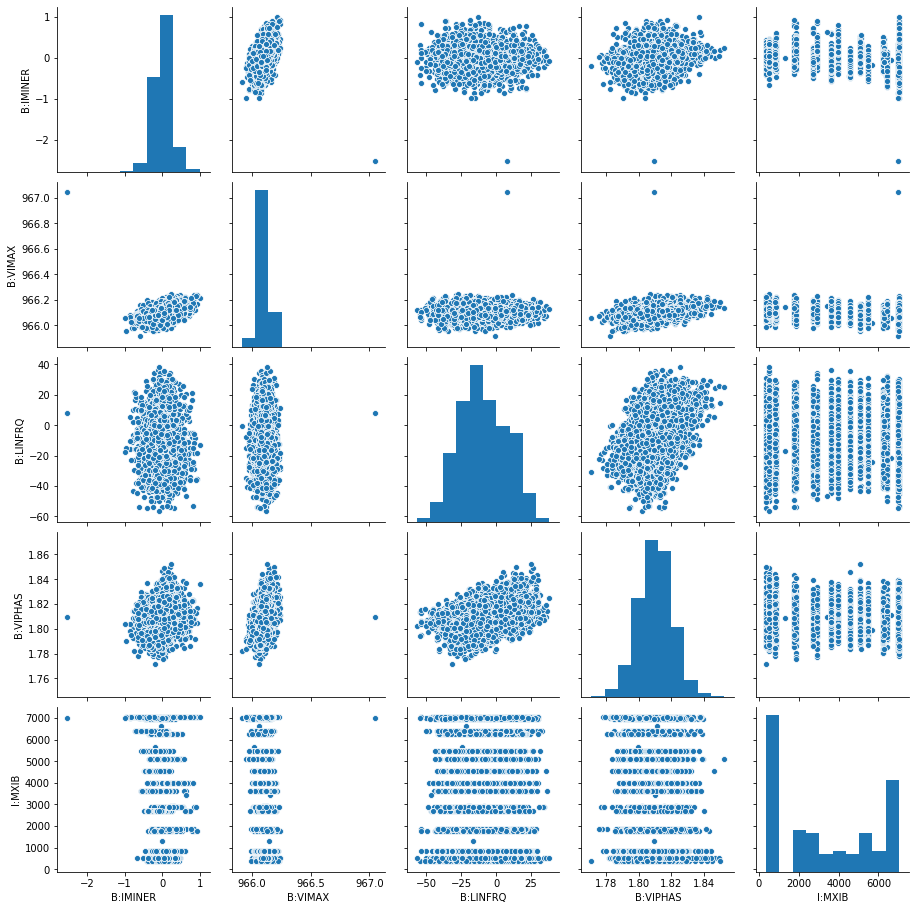

In [22]:
print("Highest Correlations to 'B:VIMIN'.")
sns.pairplot(df[var1].sample(5000),dropna=True);

Highest Correlations to 'B:IMINER'.


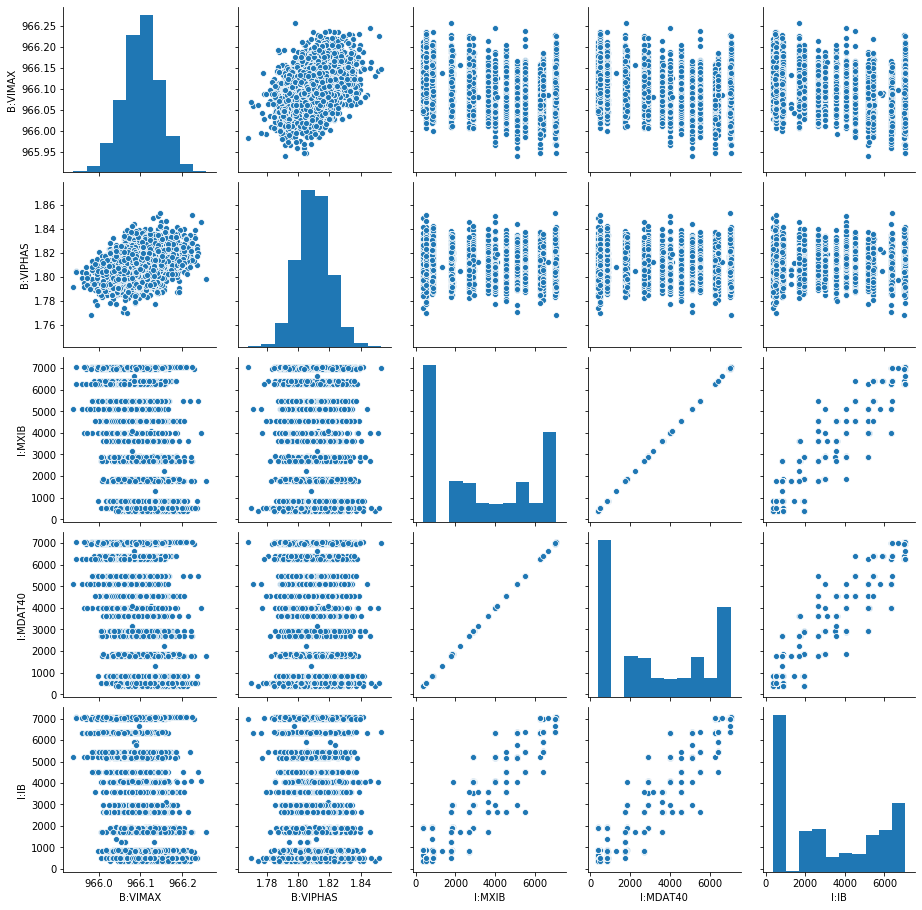

In [23]:
print("Highest Correlations to 'B:IMINER'.")
sns.pairplot(df[var2].sample(5000),dropna=True);